In [1]:
import scipy.io as scio
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np 

In [2]:
learning_curves = scio.loadmat('exp_result_two-qubit_channel/learning_curves.mat')['learning_curves'] ;

distr_trained = scio.loadmat('exp_result_two-qubit_channel/distribution_trained.mat');
X_trained = distr_trained['X'][0] ;  
Y_trained = distr_trained['Y'][0] ; 

distr_untrained = scio.loadmat('exp_result_two-qubit_channel/distribution_untrained.mat');
X_untrained = distr_untrained['X'][0] ;  
Y_untrained = distr_untrained['Y'][0] ;

In [5]:
# learning_curves[:,-1]

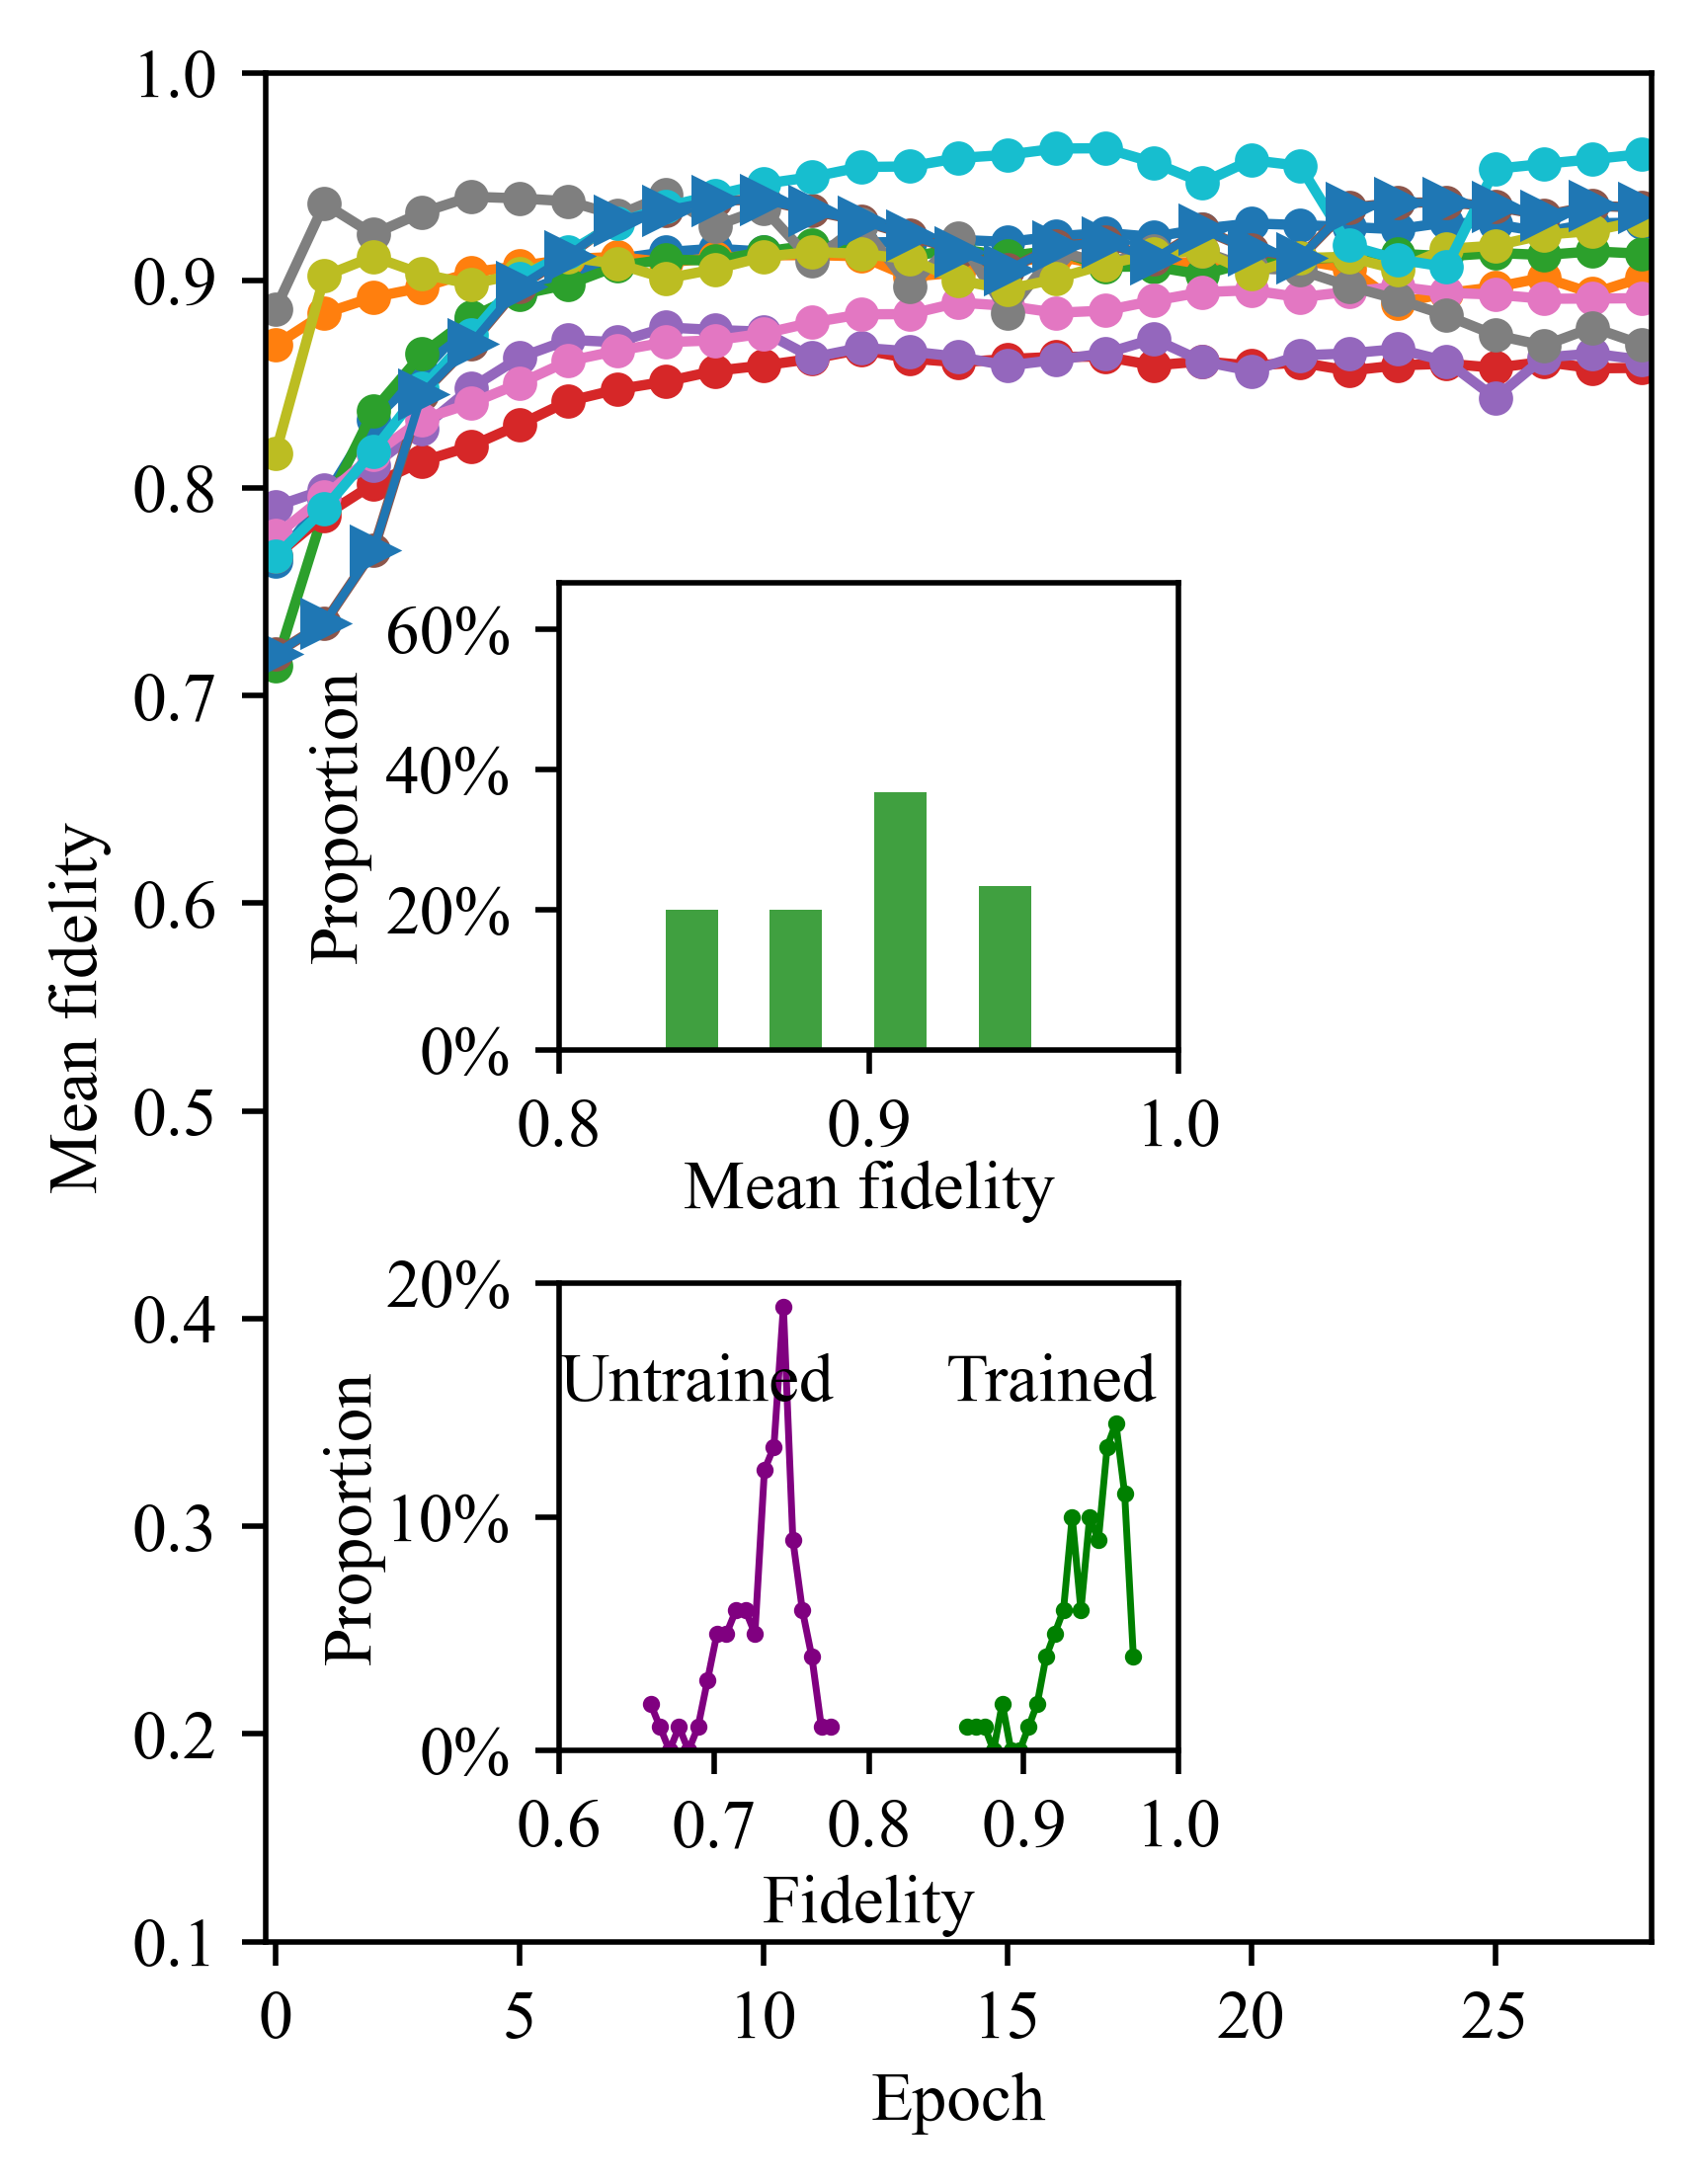

In [6]:
plt.rc('font', family = "Times New Roman", size = 10) #字体样式和大小
fig, ax = plt.subplots(figsize=(3.3, 4.3), dpi=500)

ax.set_xlim(left = -0.2,right = 28.2); ax.set_ylim(bottom = 0.1, top = 1)

for i in range(5,15):
    ax.plot(learning_curves[i], linestyle = '-', marker = 'o', markersize = 4, linewidth = 1.5)
    
ax.plot(learning_curves[10], linestyle = '-', marker = '>', markersize = 6, linewidth = 1.2)
ax.set_xlabel('Epoch', labelpad = 3)  
ax.set_ylabel("Mean fidelity", labelpad = 3)  

# ax.grid(color = 'gray', linestyle = '--', linewidth = 0.15)

#-------------------------------------------------------------------------------
def make_label(value, pos):
    return '%0.0f%%' % (100/30. * value)

left, bottom, width, height = 0.32,0.52,0.38,0.22
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim(left = 0.8, right = 1); ax2.set_ylim(bottom = 0, top = 20);
ax2.yaxis.set_major_locator(ticker.MultipleLocator(6))

ax2.hist(learning_curves[:,-1], bins = 4, rwidth=0.5,color='green', histtype='bar', alpha=0.75)

ax2.yaxis.set_major_formatter(ticker.FuncFormatter(make_label))
ax2.set_xlabel('Mean fidelity', labelpad = 0)
ax2.set_ylabel('Proportion', labelpad = 2)


#-------------------------------------------------------------------------------
left, bottom, width, height = 0.32,0.19,0.38,0.22
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlim(left = 0.6, right = 1); ax3.set_ylim(bottom = 0, top = 20);

# 轴坐标范围
ax3.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
# 轴标签 
ax3.set_ylabel('Proportion', labelpad = 0)
ax3.set_xlabel('Fidelity', labelpad = 2)

def make_label(value, pos):
    return '%0.0f%%' % (value)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(make_label))

#编号
# ax[0].text(0.5,1, 'a', fontsize = 25, weight = 'bold');

#作图
ax3.plot(X_untrained, Y_untrained, color='purple', \
           linestyle = '-', marker = 'o', markersize = 1.5, linewidth = 1, label = 'untrained')
ax3.plot(X_trained, Y_trained, color='green', \
          linestyle = '-', marker = 'o', markersize = 1.5, linewidth = 1, label = 'trained')

ax3.text(0.6, 15, 'Untrained', fontsize = 10)
ax3.text(0.85, 15, 'Trained', fontsize = 10)
# ax3.legend(title = '', loc = (1.02,0.5)) ;


plt.subplots_adjust(left = 0.14, bottom = 0.10, top = 0.98,right = 0.99, hspace = None, wspace = None) ;


# fig.savefig('fig-exp_result_two-qubit_channel.pdf', format='pdf')